In [1]:
#Library Imports
#from pyspark.sql import SparkSession, SQLContext, HiveContext
#from pyspark.conf import SparkConf
#from pyspark.sql import functions as F
#from pyspark.sql.types import IntegerType
#from pyspark.sql.functions import *
#from pyspark.sql.types import *


#### PART 1 ####

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows = 999

#######################PLOTTING FUNCTION#######################

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_1(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="r")
  sns.distplot(series.dropna(), ax=ax_hist,color="r", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()
    
# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_2(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="b")
  sns.distplot(series.dropna(), ax=ax_hist,color="b", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

# A function to show boxplot and histogram in log scale
def box_hist_log_plot(series):
  try: 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
    # Annotation for descriptive statistics of the data
    stats_desc = ""
    for idx in stats_describe.index.tolist():
      stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
    ax_hist.annotate(
      stats_desc, 
      xy=(1.01, 1), 
      xycoords='axes fraction', 
      verticalalignment='top',
      horizontalalignment='left'
    )
    
    s_new = np.log10(series)
    s_new[s_new == -np.inf] = np.nan
    IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.1
    s_range = s_new.max() - s_new.quantile(0.05)
    cube = np.cbrt(len(s_new))
    newBins = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    sns.boxplot(series, ax=ax_box)
    sns.distplot(series.dropna(), bins=newBins, ax=ax_hist, kde=False)
    ax_box.set(xlabel='')
    ax_box.set(xscale="log")
    plt.show()
  except ValueError:
    pass

# A function to show boxplot and histogram for each feature by its label
def divided_box_hist_plot(series, y):
  labels = y.unique()
  gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
  f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
  sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
  sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
  ax[0][0].set(xlabel="")
  ax[0][1].set(xlabel="")
  sns.distplot(series[y==labels[0]].dropna(), color="red", ax=ax[1][0], kde=False)
  sns.distplot(series[y==labels[1]].dropna(), color="blue", ax=ax[1][1], kde=False)
  ax[1][0].set(xlabel=f"{series.name} ({labels[0]})")
  ax[1][1].set(xlabel=f"{series.name} ({labels[1]})")
  plt.show()

# A function to show boxplot and histogram for each feature by its label in log scale
def divided_box_hist_log_plot(series, y):
  try:
    newBins = dict()
    labels = y.unique()
    for target in labels:
      s_new = np.log10(series[y==target])
      s_new[s_new == -np.inf] = np.nan
      IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.01
      s_range = s_new.max() - s_new.quantile(0.05)
      cube = np.cbrt(len(s_new))
      newBins[target] = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
    f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
    sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
    sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
    ax[0][0].set(xlabel="")
    ax[0][1].set(xlabel="")
    sns.distplot(series[y==labels[0]].dropna(), bins=newBins[f"{labels[0]}"], color="red", ax=ax[1][0], kde=False)
    sns.distplot(series[y==labels[1]].dropna(), bins=newBins[f"{labels[1]}"], color="blue", ax=ax[1][1], kde=False)
    ax[1][0].set(xlabel=f"{series.name} ({labels[0]})", xscale="log")
    ax[1][1].set(xlabel=f"{series.name} ({labels[1]})", xscale="log")
    plt.show()
  except ValueError:
    pass
  
# A function to show barplot (categorical features only)
def bar_plot(series):
  ax = series.value_counts(dropna=False) \
             .plot(kind="bar")
    
  # Annotation for percentage of each bar
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    pct = height / len(series) * 100
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax.set_xlabel(series.name)
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe()
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

def divided_bar_plot(series, y):
  labels = y.unique()
  f, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[.5, .5]))
  series[y==labels[0]].value_counts(dropna=False).plot.bar(color="red", ax=ax[0])
  series[y==labels[1]].value_counts(dropna=False).plot.bar(color="blue", ax=ax[1])
  
  # Annotation for percentage of each bar
  for ax_i in ax:
    tot_height = 0
    for p in ax_i.patches:
      tot_height += p.get_height()
    
    for p in ax_i.patches:
      width = p.get_width()
      height = p.get_height()
      pct = height / tot_height * 100
      x, y = p.get_xy() 
      ax_i.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax[0].set_xlabel(f"{series.name} ({labels[0]})")
  ax[1].set_xlabel(f"{series.name} ({labels[1]})")
  plt.show()


# A function to show correlation between numeric features
def numeric_corr(df, method="spearman"):
  plt.figure(figsize=(14, 14))
  sns.heatmap(df.corr(method=method), 
              cbar=True, 
              center=0, 
              annot=True, 
              annot_kws={"fontsize":3})
  plt.show()


#### PART 2 ####

## Plot data dalam bentuk histogram (gunakan untuk mengetahui distribusi data)
### data_frame: data to be plotted in pandas dataframe format
### feature_name: feature in dataframe to be used
### n_bins: jumlah bins untuk plot histogram
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_hists(data_frame, feature_name, n_bins, plot_label, plot_title, path_file=None, grid=True, density=False, save_figure=False):
    sea_plot = sns.distplot(data_frame[feature_name], kde=density, bins=n_bins)

    p5, q1, q2, q3, p95 = np.percentile(data_frame[feature_name], [5, 25, 50, 75, 95])
    mean_feature = np.around(np.mean(data_frame[feature_name]), 2)
    min_feature = np.around(np.min(data_frame[feature_name]), 2)
    std_feature = np.around(np.std(data_frame[feature_name]), 2)
    var_feature = np.around(np.var(data_frame[feature_name]), 2)
    max_feature = np.around(np.max(data_frame[feature_name]), 2)

    plt.ticklabel_format(axis='x', style='plain')
    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.axvline(x=mean_feature, color='c', linestyle='--', label='Mean')
    plt.axvline(x=np.around(q2, 2), color='m', linestyle='--', label='Median')
    plt.axvline(x=np.around(p5, 2), color='b', linestyle='--', label='Percentile-5%')
    plt.axvline(x=np.around(p95, 2), color='r', linestyle='--', label='Percentile-95%')
    plt.axvline(x=np.around(q1, 2), color='g', linestyle='--', label='Q1')
    plt.axvline(x=np.around(q3, 2), color='y', linestyle='--', label='Q3')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    
    stat_desc = "Count: " + str(len(data_frame[feature_name])) + "\nMean: " + str(mean_feature) + "\nStdDev: " + str(std_feature) \
        + "\nVariansi: " + str(var_feature) + "\nMin: " + str(min_feature) \
            + "\nPercentile-5%: " + str(np.around(p5, 2)) + "\nQ1: " + str(np.around(q1, 2)) \
                + "\nMedian: " + str(np.around(q2, 2)) + "\nQ3: " + str(np.around(q3, 2)) \
                    + "\nPercentile-95%: " + str(np.around(p95, 2)) + "\nIQR: " + str(np.around(q3-q1, 2)) + "\nMax: " + str(max_feature) 
    
    plt.gcf().text(0.907, 0.86, stat_desc, fontdict={'size': 12, 'verticalalignment': 'top', 'horizontalalignment': 'left'})
    
    ### Put the legend out of the figure
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
    
    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

def plot_hbar(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    ### Plot Bar Chart from data
    ax = sns.barplot(x=axis_features[0], y=axis_features[1], data=data_frame)

    #ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks()])
    plt.setp(ax.get_xticklabels(), ha='center', va='top')
    #print([x for x in ax.get_xticklabels(False)])
    #plt.setp(ax.get_xticklabels(), rotation=90, ha='left', va='top')
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    
    for indeks, value in enumerate(data_frame[axis_features[1]]):
        #ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')
        ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    
    locs, labels=plt.xticks()
    x_ticks = []
    plt.xticks(locs,time_interval, rotation=45, horizontalalignment='right')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})

    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

## Plot data dalam bentuk categories plot (gunakan untuk mengetahui distribusi subclass masing - masing class)
### data_frame: data to be plotted in pandas dataframe format
### axis_features: feature in dataframe to be used as axis [x, y]
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_categories(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    sns.factorplot(x=axis_features[0], y=axis_features[1], hue=axis_features[2], data=data_frame, kind='bar', aspect=2, legend=False)

    ax = plt.gca()
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    ax.set_xticklabels(labels=data_frame[axis_features[0]].unique(), rotation=90)

    for p in ax.patches:
      if ~np.isnan(p.get_height()):
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom', rotation=90)

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12}, ha='left')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.grid(grid)
    #if save_figure and path_file is not None:
    #    plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
    
    
def plot_boxplot(data_frame,y,plot_title,x=None,grup=None):
    '''
      Menghasilkan boxplot untuk 1 atau 2 variabel beserta target variabel

      Args :
       - data_frame (pd.DataFrame) : Dataset
       - y (numeric)               : Variabel pertama
       - plot_title (string)       : Judul plot
       - x (categorical/object)    : Variabel kedua
       - grup (categorical/object) : Variabel target

      Return :
       - figure: boxplot
    '''
    fig = plt.figure(figsize =(15, 8))
    ax = sns.boxplot(data = data_frame, x=x, y = y,hue = grup,
                     width=0.8,linewidth=2,showmeans=True,
                     meanprops={"marker":"o",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"black",
                                "markersize":"10"})
    max_y = np.max(data_frame[y])
    plt.ylim(0,max_y+(0.3*max_y))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    if x is not None:
        plt.xlabel('{}'.format(x.lower()), fontsize=15, fontweight='black', color = '#333F4B')
        
    plt.ylabel('{}'.format(y.lower()), fontsize=15, fontweight='black', color = '#333F4B')



# Import Data

In [2]:
pd_source = pd.read_csv('dataset HR analytics.csv', header=0, low_memory=False)
pd_source.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,A Ridwan,10001,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,07/10/1983,Sunda,07/05/2011,NaN,N/A-StillEmployed,Active,LinkedIn,4.60,5,0,1/17/2020,0,1
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,05/05/1975,Sunda,3/30/2015,6/16/2018,career change,Voluntarily Terminated,Indeed,4.96,3,6,2/24/2017,0,17
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,09/19/88,Jawa,07/05/2011,9/24/2014,hours,Voluntarily Terminated,LinkedIn,3.02,3,0,5/15/2013,0,3
3,Adji Wijaya Kusuma,10004,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,09/27/88,Cina,01/07/2008,NaN,N/A-StillEmployed,Active,Indeed,4.84,5,0,01/03/2020,0,15
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,09/08/1989,Bali,07/11/2011,09/06/2018,return to school,Voluntarily Terminated,Google Search,5.00,4,0,02/01/2017,0,2


<AxesSubplot:title={'center':'Kolom yang memiliki Null(1/24)'}>

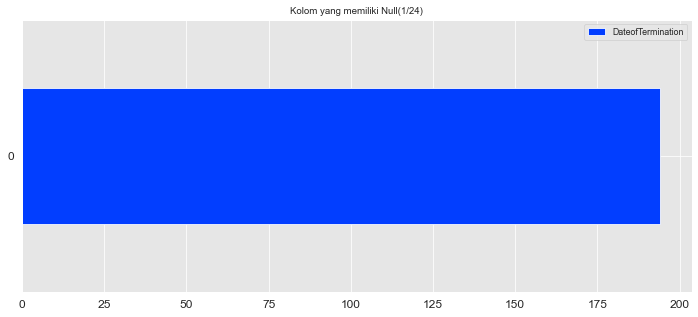

In [3]:
#hitung jumlah NULL dalam setiap kolom
# Count total NaN at each column in a DataFrame 
data_null = pd.DataFrame(pd_source.isnull().sum())
data_null = data_null.transpose()
data_null_filter=data_null.loc[:, (data_null != 0).any(axis=0)]
data_null_filter.plot(kind='barh',title='Kolom yang memiliki Null(1/24)',fontsize=12)

# Make a Label

In [4]:
#Run 1x
pd_source['EmploymentStatus'] = (pd_source['EmploymentStatus'] =='Active').astype(int)
pd_source.EmploymentStatus.value_counts()

1    194
0     93
Name: EmploymentStatus, dtype: int64

In [5]:
#change to datetime
pd_source['DOB'] = pd.to_datetime(pd_source['DOB'])
pd_source['DateofHire'] = pd.to_datetime(pd_source['DateofHire'])
pd_source['DateofTermination'] = pd.to_datetime(pd_source['DateofTermination'])
pd_source['LastPerformanceReview_Date'] = pd.to_datetime(pd_source['LastPerformanceReview_Date'])
pd_source['DateofTermination'] = pd.to_datetime(pd_source['DateofTermination'])

In [6]:
#add new features
pd_source['age_until_hire'] = pd_source['DateofHire']-pd_source['DOB'] #in days
pd_source['hire_to_review']= pd_source['LastPerformanceReview_Date']-pd_source['DateofHire'] #in days
pd_source['empSatisfaction_to_Absences'] = pd_source['EmpSatisfaction']/pd_source['Absences']

In [7]:
age_until_hire_day = []
hire_to_review_day = []

for i in range(pd_source.shape[0]):
    age_until_hire_day.append(pd_source.age_until_hire.iloc[i].days/365)
    hire_to_review_day.append(pd_source.hire_to_review.iloc[i].days/365)

pd_source['age_when_hire_day'] = age_until_hire_day
pd_source['hire_to_review_day']= hire_to_review_day

pd_source = pd_source.drop(columns=['age_until_hire','hire_to_review'])
pd_source.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day
0,A Ridwan,10001,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,1983-07-10,Sunda,2011-07-05,NaT,N/A-StillEmployed,1,LinkedIn,4.60,5,0,2020-01-17,0,1,5.000000,28.005479,8.542466
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,1975-05-05,Sunda,2015-03-30,2018-06-16,career change,0,Indeed,4.96,3,6,2017-02-24,0,17,0.176471,39.928767,1.909589
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,1988-09-19,Jawa,2011-07-05,2014-09-24,hours,0,LinkedIn,3.02,3,0,2013-05-15,0,3,1.000000,22.805479,1.863014
3,Adji Wijaya Kusuma,10004,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,1988-09-27,Cina,2008-01-07,NaT,N/A-StillEmployed,1,Indeed,4.84,5,0,2020-01-03,0,15,0.333333,19.290411,11.997260
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,1989-09-08,Bali,2011-07-11,2018-09-06,return to school,0,Google Search,5.00,4,0,2017-02-01,0,2,2.000000,21.852055,5.567123


# EDA 1

In [8]:
data_resign = pd_source.loc[pd_source['EmploymentStatus'] == 0]
data_active = pd_source.loc[pd_source['EmploymentStatus'] == 1]

In [9]:
def pie_charts(series,feature, title):
    list_data = series[feature].unique().tolist()
    list_num=[]
    for i in range(len(list_data)):
        list_num.append(series.loc[series[feature] == list_data[i]].shape[0])
    
    explodes = [0]*len(list_data)
    
    fig1, ax1 = plt.subplots(figsize=(10,8))
    ax1.pie(list_num, explode = explodes,labels=list_data, autopct='%1.1f%%',
            shadow=False,startangle=90, labeldistance=1.05, textprops={'fontsize': 15})

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title,fontsize=17)
    plt.show()

# Persentase Karyawan Resign

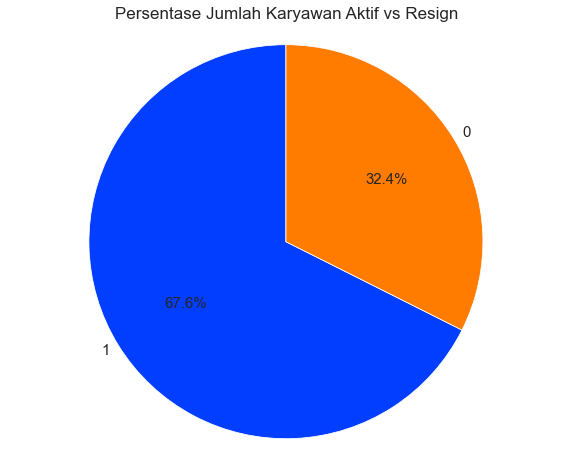

In [10]:
pie_charts(pd_source, 'EmploymentStatus', 'Persentase Jumlah Karyawan Aktif vs Resign')

# Persentase antara karyawan resign vs aktif pada tiap fitur kategorikal 

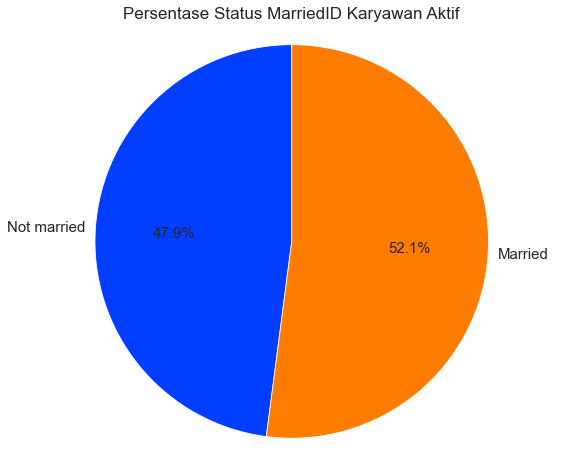

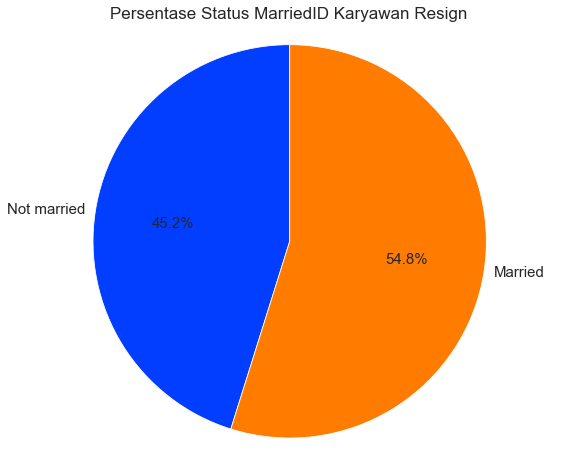

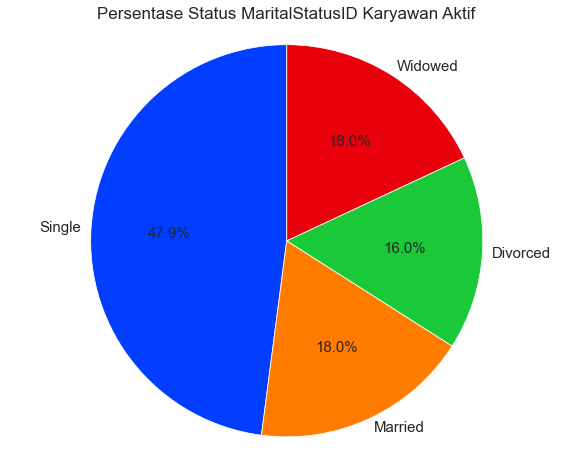

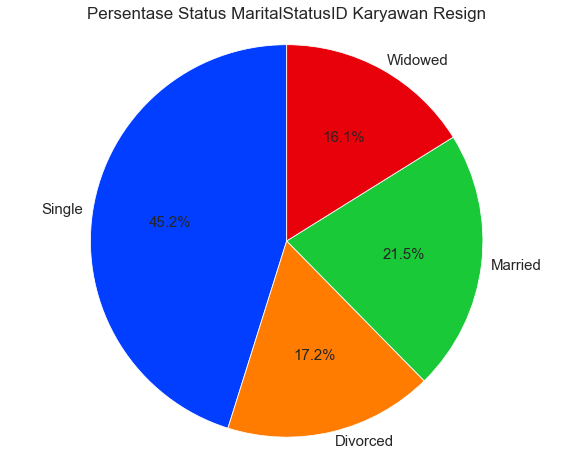

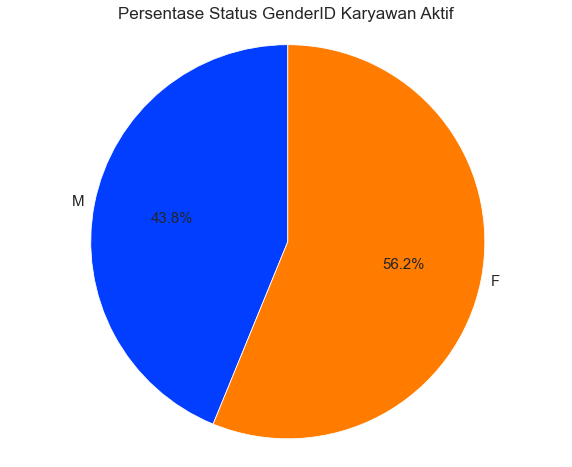

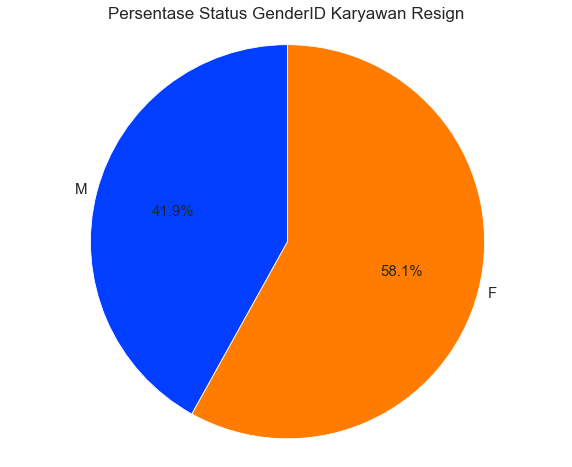

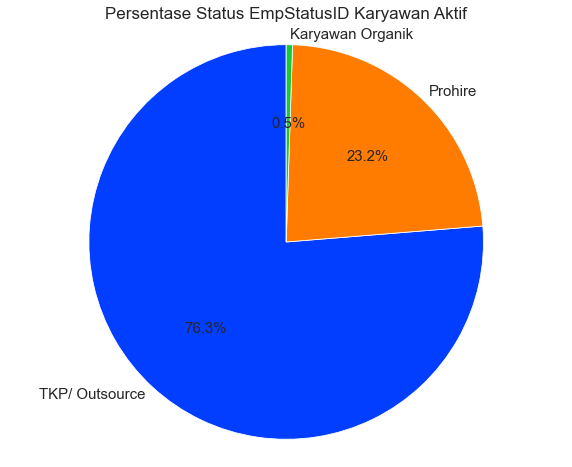

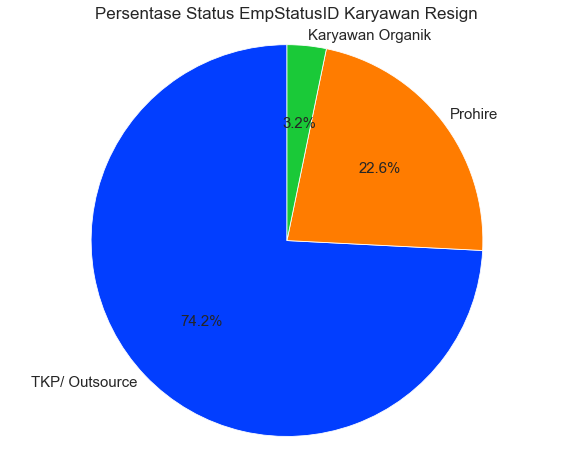

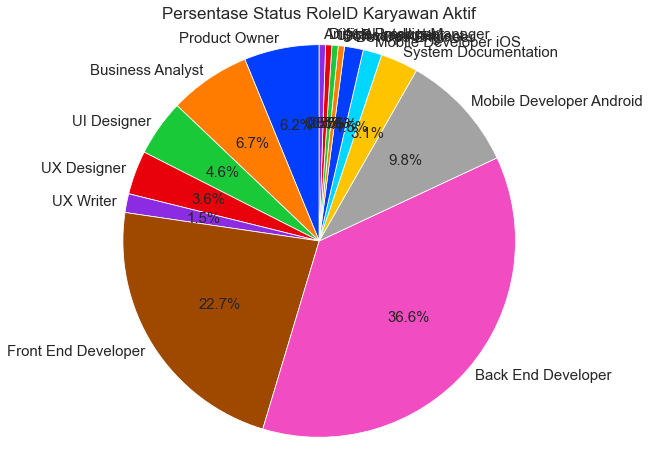

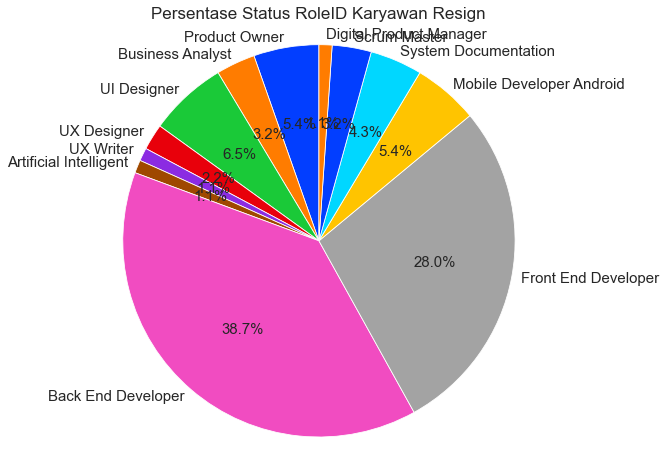

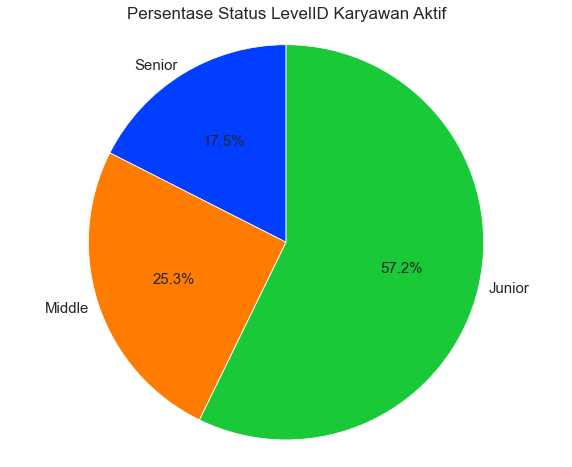

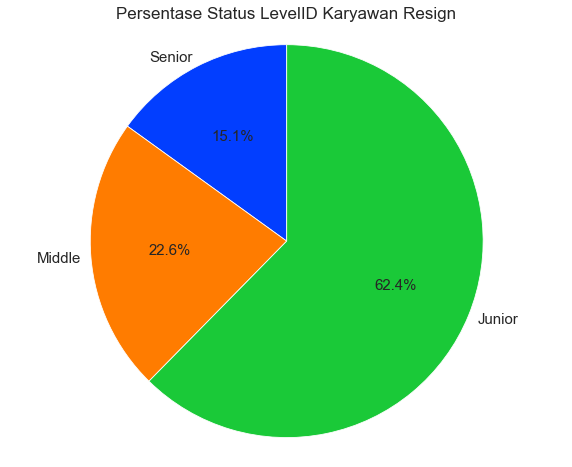

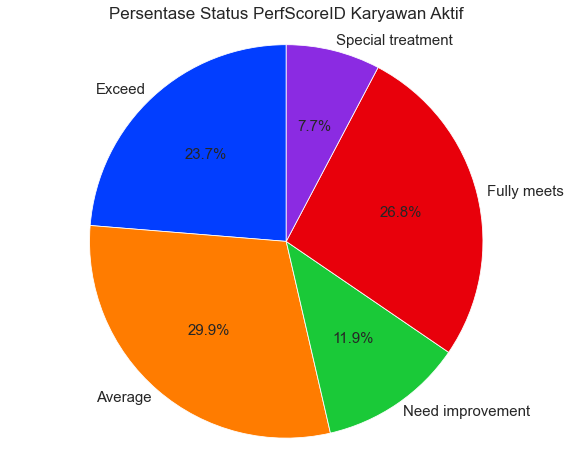

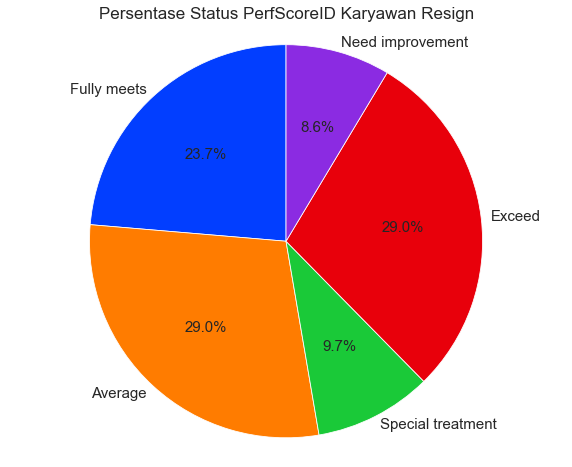

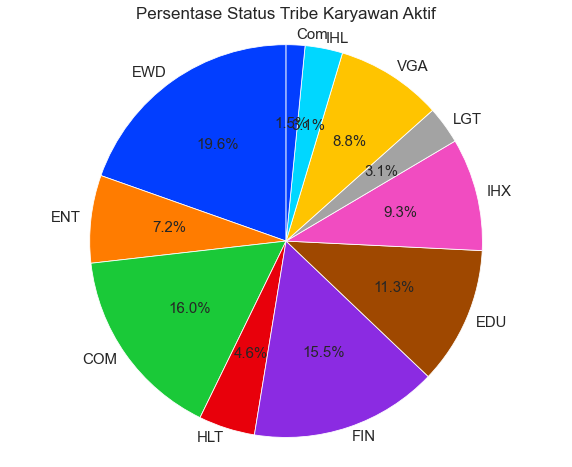

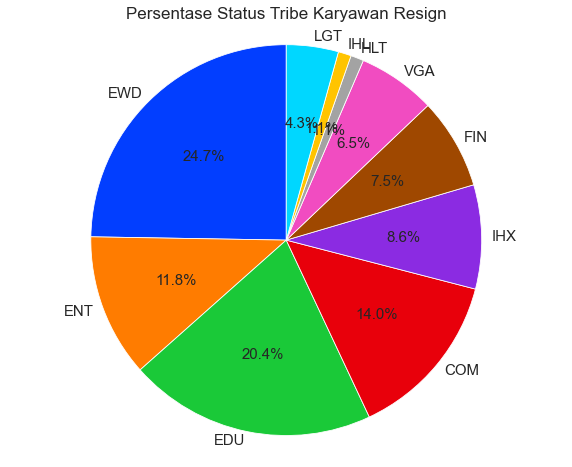

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


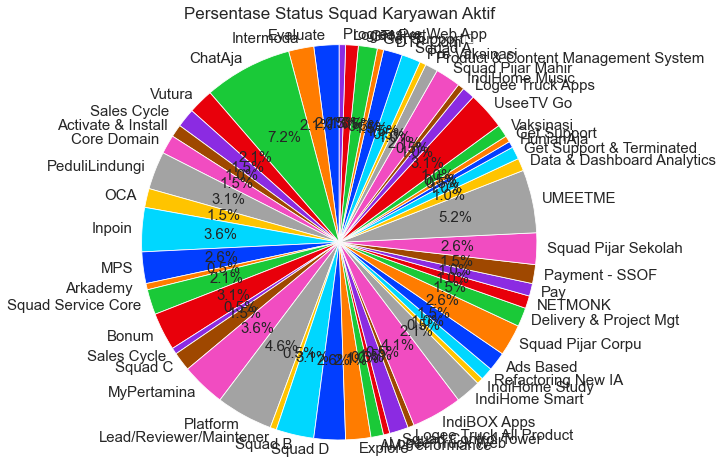

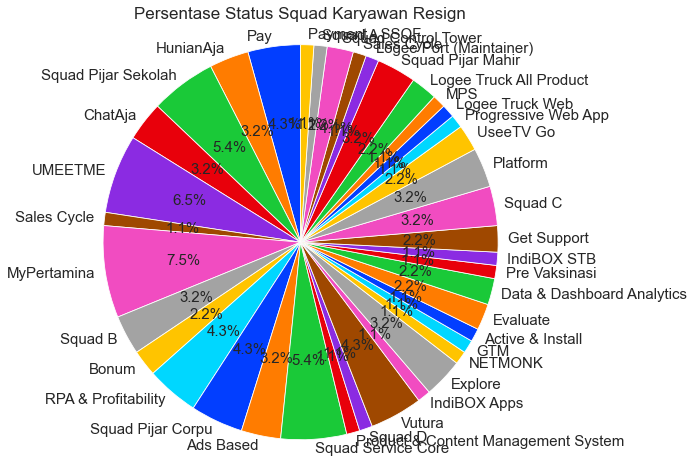

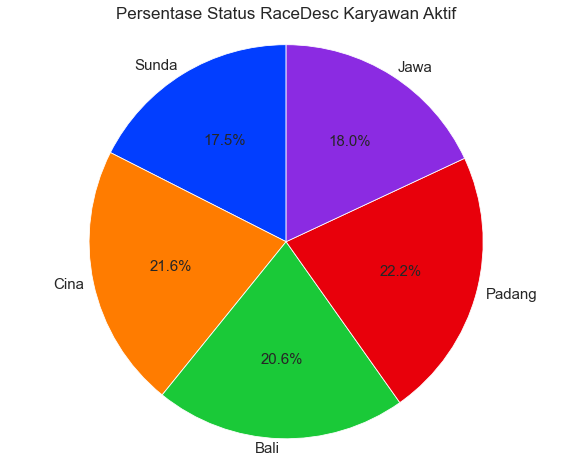

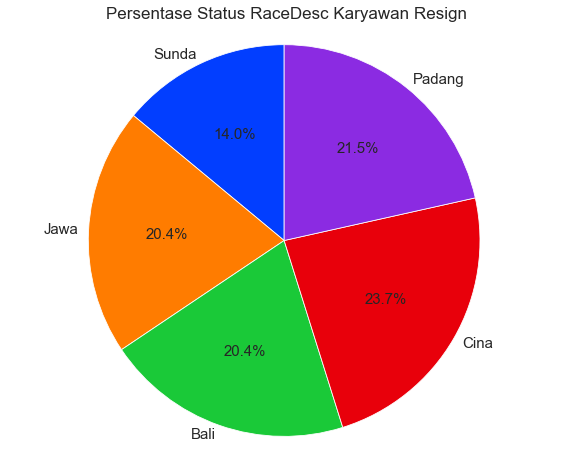

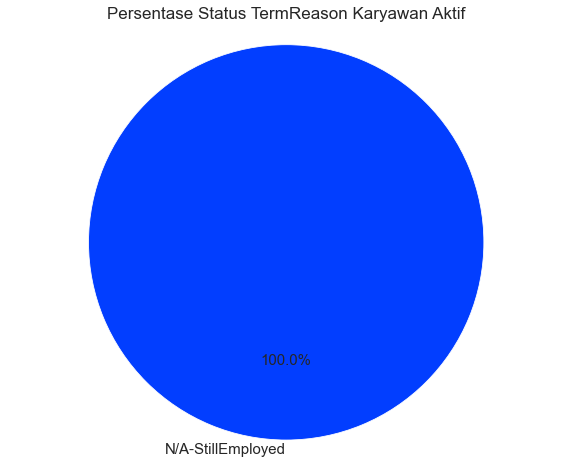

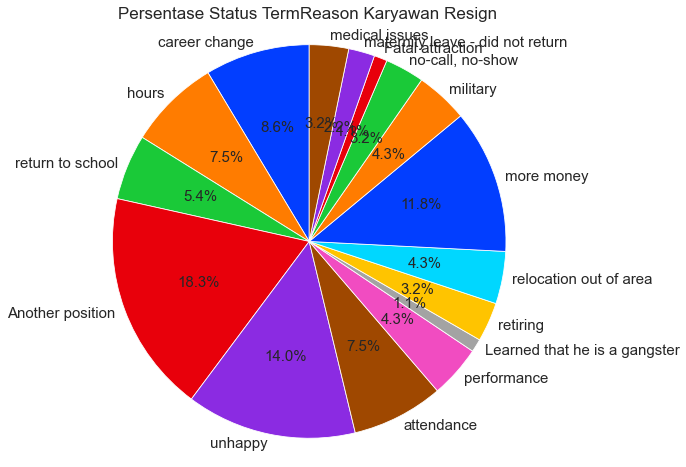

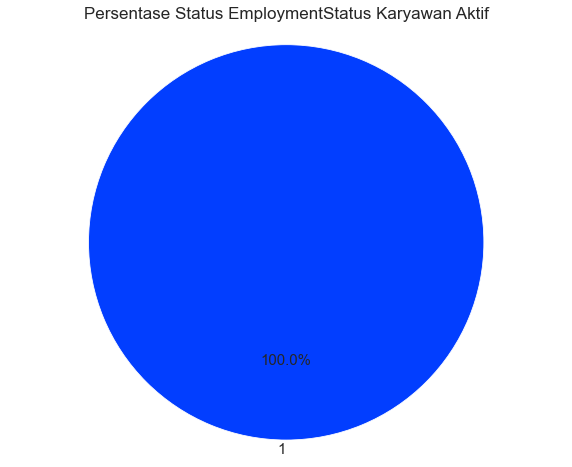

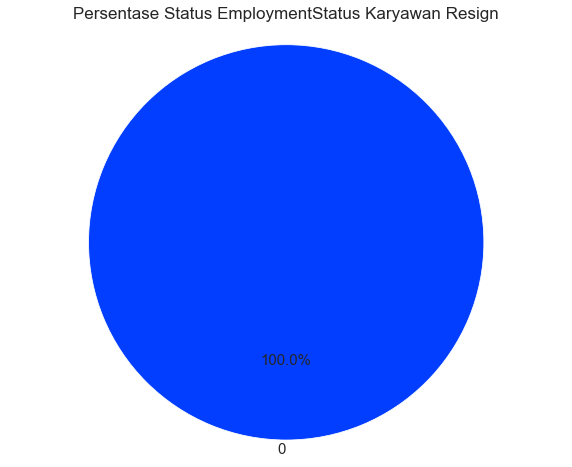

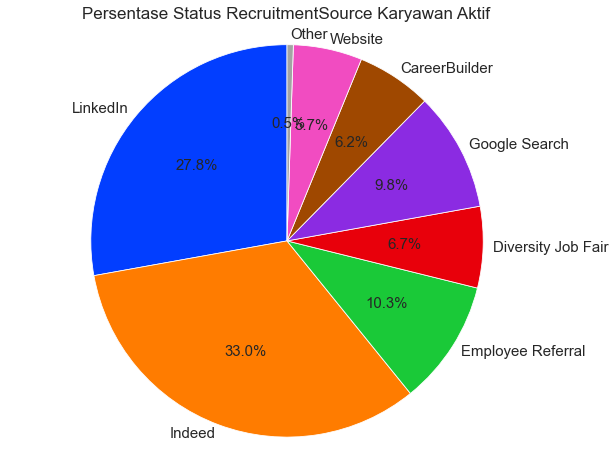

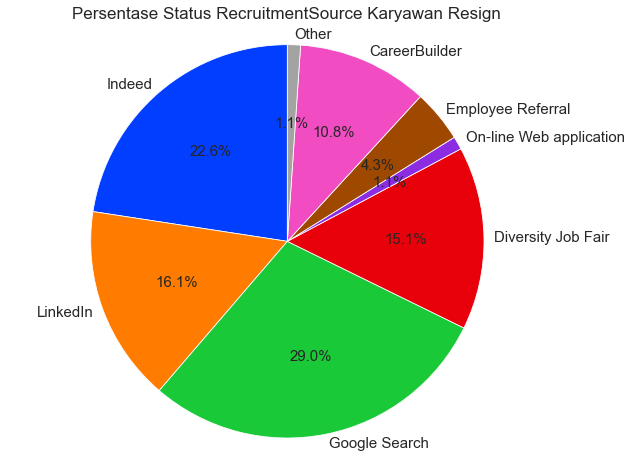

In [11]:
list_column = ['MarriedID','MaritalStatusID','GenderID','EmpStatusID',
 'RoleID','LevelID','PerfScoreID','Tribe','Squad','RaceDesc','TermReason','EmploymentStatus','RecruitmentSource']

for i in range(len(list_column)):
    pie_charts(data_active, list_column[i], 'Persentase Status {} Karyawan Aktif'.format(list_column[i]))
    pie_charts(data_resign, list_column[i], 'Persentase Status {} Karyawan Resign'.format(list_column[i]))


# Alasan Resign Berdasarkan Gender

In [190]:
resign_cewek = data_resign.loc[data_resign['GenderID']=='F']
resign_cowok = data_resign.loc[data_resign['GenderID']=='M']
resign_cewek

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,1988-09-19,Jawa,2011-07-05,2014-09-24,hours,0,LinkedIn,3.02,3,0,2013-05-15,0,3,1.000000,22.805479,1.863014
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,1989-09-08,Bali,2011-07-11,2018-09-06,return to school,0,Google Search,5.00,4,0,2017-02-01,0,2,2.000000,21.852055,5.567123
10,Ahmad Luthfi Mahar,10011,Married,Divorced,F,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,ChatAja,1974-01-12,Jawa,2011-01-10,2019-01-12,Another position,0,Diversity Job Fair,4.20,4,0,2017-01-30,0,12,0.333333,37.019178,6.060274
18,Andre,10019,Not married,Single,F,Prohire,UI Designer,Junior,Fully meets,EDU,Squad Pijar Sekolah,1986-04-04,Padang,2014-07-07,2017-09-12,performance,0,Google Search,4.50,4,5,2016-01-15,0,8,0.500000,28.276712,1.526027
24,Anshory Muhammad,10025,Married,Widowed,F,Prohire,UX Writer,Junior,Special treatment,ENT,MyPertamina,2067-01-16,Padang,2011-01-10,2016-04-04,career change,0,Google Search,4.80,5,0,2015-03-04,0,5,1.000000,-56.054795,4.147945
28,Arsya Shafira Firstri,10029,Married,Divorced,F,TKP/ Outsource,Back End Developer,Middle,Exceed,ENT,MyPertamina,1990-08-24,Padang,2012-04-02,2015-06-15,Another position,0,Google Search,3.35,4,0,2014-03-04,0,6,0.666667,21.621918,1.920548
32,Astria Karismawati,10033,Not married,Single,F,TKP/ Outsource,Front End Developer,Middle,Fully meets,EWD,RPA & Profitability,1964-06-01,Cina,2011-08-15,2016-08-02,Another position,0,Google Search,3.14,5,0,2014-02-10,1,19,0.263158,47.235616,2.493151
46,Burhanudin Ramdhani,10047,Married,Married,F,TKP/ Outsource,Back End Developer,Junior,Average,FIN,Bonum,1983-08-27,Jawa,2011-06-27,2017-11-15,relocation out of area,0,Indeed,4.30,4,0,2016-03-10,0,3,1.333333,27.852055,4.706849
49,Christi Yanti Pardede,10050,Not married,Single,F,TKP/ Outsource,Front End Developer,Junior,Fully meets,EDU,Squad Pijar Corpu,1981-08-31,Bali,2011-05-16,2015-01-07,unhappy,0,Google Search,4.20,5,0,2013-05-03,0,9,0.555556,29.726027,1.967123
68,Dini Agustini Fajri,10069,Married,Married,F,TKP/ Outsource,Back End Developer,Middle,Exceed,VGA,Ads Based,2051-02-25,Sunda,2011-04-04,2017-11-04,more money,0,Google Search,4.62,5,0,2016-05-06,0,1,5.000000,-39.923288,5.093151


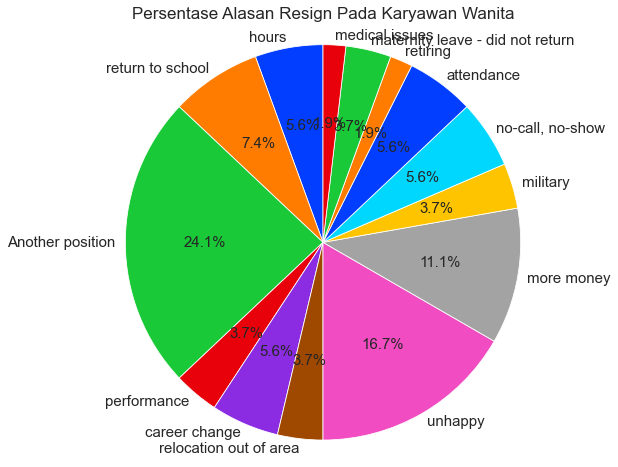

In [191]:
pie_charts(resign_cewek, 'TermReason', 'Persentase Alasan Resign Pada Karyawan Wanita')

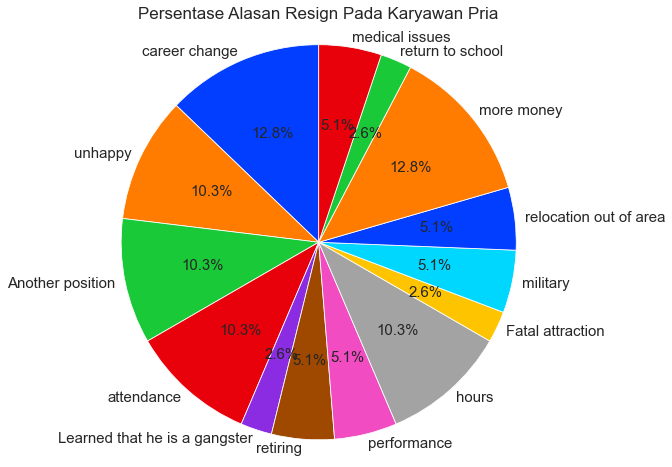

In [192]:
pie_charts(resign_cowok, 'TermReason', 'Persentase Alasan Resign Pada Karyawan Pria')

In [193]:
unhapy_employee=data_resign.loc[data_resign['TermReason']=='unhappy']
unhapy_employee

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890
49,Christi Yanti Pardede,10050,Not married,Single,F,TKP/ Outsource,Front End Developer,Junior,Fully meets,EDU,Squad Pijar Corpu,1981-08-31,Bali,2011-05-16,2015-01-07,unhappy,0,Google Search,4.20,5,0,2013-05-03,0,9,0.555556,29.726027,1.967123
65,Difa Al,10066,Married,Married,M,TKP/ Outsource,Mobile Developer Android,Junior,Need improvement,EDU,Squad Service Core,1977-10-31,Cina,2011-05-16,2018-06-08,unhappy,0,Indeed,5.00,4,0,2017-04-02,0,14,0.285714,33.561644,5.884932
136,Irman Juliansyah,10137,Not married,Single,F,TKP/ Outsource,System Documentation,Middle,Need improvement,EDU,Squad Service Core,1976-09-22,Cina,2011-02-21,2015-04-01,unhappy,0,Google Search,3.72,3,0,2014-02-01,0,18,0.166667,34.438356,2.947945
137,Ismi Dwi Lestari,10138,Not married,Single,M,TKP/ Outsource,Front End Developer,Junior,Need improvement,COM,UMEETME,1976-11-15,Bali,2011-02-21,2014-09-24,unhappy,0,Indeed,2.34,2,0,2013-04-12,3,4,0.500000,34.290411,2.139726
146,Khonsa Qurrotul Ain,10147,Not married,Single,F,Prohire,Back End Developer,Junior,Fully meets,IHX,Squad C,1986-04-17,Jawa,2011-01-10,2018-04-01,unhappy,0,CareerBuilder,4.00,4,0,2017-02-03,0,4,1.000000,24.750685,6.071233
168,Mochamad Ramdhan,10169,Married,Widowed,F,TKP/ Outsource,Scrum Master,Middle,Special treatment,EDU,Squad Pijar Sekolah,1981-03-26,Padang,2011-07-05,2020-09-26,unhappy,0,Indeed,3.18,4,0,2019-03-02,0,16,0.250000,30.295890,7.663014
188,Muhammad Ilham Rilambang,10189,Not married,Single,M,Karyawan Organik,Product Owner,Junior,Exceed,EWD,Explore,1985-06-29,Cina,2011-08-15,2016-09-04,unhappy,0,LinkedIn,3.00,2,0,2014-01-14,6,6,0.333333,26.145205,2.419178
206,Nurisyani,10207,Married,Married,F,Prohire,Back End Developer,Junior,Average,LGT,Logee Truck All Product,1952-02-11,Bali,2012-05-14,2015-08-19,unhappy,0,LinkedIn,5.00,3,0,2014-07-02,0,17,0.176471,60.295890,2.134247
215,R. Abimanyu Sutomo,10216,Married,Divorced,F,TKP/ Outsource,Back End Developer,Senior,Exceed,ENT,HunianAja,1989-07-18,Cina,2011-07-05,2017-09-15,unhappy,0,CareerBuilder,2.40,5,0,2016-02-06,5,2,2.500000,21.978082,4.594521


# Data Numerikal

In [194]:
data_resign['Working_Time'] = data_resign['DateofTermination'] - data_resign['DateofHire']
data_resign

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,Working_Time
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,1975-05-05,Sunda,2015-03-30,2018-06-16,career change,0,Indeed,4.96,3,6,2017-02-24,0,17,0.176471,39.928767,1.909589,1174 days
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,1988-09-19,Jawa,2011-07-05,2014-09-24,hours,0,LinkedIn,3.02,3,0,2013-05-15,0,3,1.000000,22.805479,1.863014,1177 days
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,1989-09-08,Bali,2011-07-11,2018-09-06,return to school,0,Google Search,5.00,4,0,2017-02-01,0,2,2.000000,21.852055,5.567123,2614 days
10,Ahmad Luthfi Mahar,10011,Married,Divorced,F,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,ChatAja,1974-01-12,Jawa,2011-01-10,2019-01-12,Another position,0,Diversity Job Fair,4.20,4,0,2017-01-30,0,12,0.333333,37.019178,6.060274,2924 days
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890,2361 days
14,Amalia Erza Syafitri,10015,Married,Married,M,TKP/ Outsource,UI Designer,Junior,Special treatment,EWD,Pay,1977-07-15,Cina,2012-09-24,2019-04-06,Another position,0,On-line Web application,5.00,5,0,2018-03-02,0,1,5.000000,35.219178,5.438356,2385 days
15,Amalia Nurul Hidayah,10016,Not married,Single,M,TKP/ Outsource,UX Designer,Junior,Fully meets,EWD,Sales Cycle,1981-10-18,Bali,2011-02-21,2019-08-04,attendance,0,Google Search,5.00,4,0,2018-04-05,0,20,0.200000,29.364384,7.123288,3086 days
18,Andre,10019,Not married,Single,F,Prohire,UI Designer,Junior,Fully meets,EDU,Squad Pijar Sekolah,1986-04-04,Padang,2014-07-07,2017-09-12,performance,0,Google Search,4.50,4,5,2016-01-15,0,8,0.500000,28.276712,1.526027,1163 days
24,Anshory Muhammad,10025,Married,Widowed,F,Prohire,UX Writer,Junior,Special treatment,ENT,MyPertamina,2067-01-16,Padang,2011-01-10,2016-04-04,career change,0,Google Search,4.80,5,0,2015-03-04,0,5,1.000000,-56.054795,4.147945,1911 days
25,Arief Luthfi,10026,Not married,Single,M,TKP/ Outsource,Artificial Intelligent,Junior,Exceed,IHX,Squad B,2064-07-30,Cina,2014-02-17,2018-02-19,Learned that he is a gangster,0,LinkedIn,3.50,5,7,2017-01-10,0,2,2.500000,-50.482192,2.898630,1463 days


In [196]:
Working_Time = []

for i in range(data_resign.shape[0]):
    Working_Time.append(data_resign.Working_Time.iloc[i].days/365)

data_resign['working_time'] = Working_Time

data_resign = data_resign.drop(columns=['Working_Time'])
data_resign.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,working-time,working_time
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,1975-05-05,Sunda,2015-03-30,2018-06-16,career change,0,Indeed,4.96,3,6,2017-02-24,0,17,0.176471,39.928767,1.909589,3.216438,3.216438
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,1988-09-19,Jawa,2011-07-05,2014-09-24,hours,0,LinkedIn,3.02,3,0,2013-05-15,0,3,1.000000,22.805479,1.863014,3.224658,3.224658
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,1989-09-08,Bali,2011-07-11,2018-09-06,return to school,0,Google Search,5.00,4,0,2017-02-01,0,2,2.000000,21.852055,5.567123,7.161644,7.161644
10,Ahmad Luthfi Mahar,10011,Married,Divorced,F,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,ChatAja,1974-01-12,Jawa,2011-01-10,2019-01-12,Another position,0,Diversity Job Fair,4.20,4,0,2017-01-30,0,12,0.333333,37.019178,6.060274,8.010959,8.010959
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890,6.468493,6.468493


In [197]:
data_resign = data_resign.drop(columns=['working-time'])
data_resign.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,working_time
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,1975-05-05,Sunda,2015-03-30,2018-06-16,career change,0,Indeed,4.96,3,6,2017-02-24,0,17,0.176471,39.928767,1.909589,3.216438
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,1988-09-19,Jawa,2011-07-05,2014-09-24,hours,0,LinkedIn,3.02,3,0,2013-05-15,0,3,1.000000,22.805479,1.863014,3.224658
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,1989-09-08,Bali,2011-07-11,2018-09-06,return to school,0,Google Search,5.00,4,0,2017-02-01,0,2,2.000000,21.852055,5.567123,7.161644
10,Ahmad Luthfi Mahar,10011,Married,Divorced,F,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,ChatAja,1974-01-12,Jawa,2011-01-10,2019-01-12,Another position,0,Diversity Job Fair,4.20,4,0,2017-01-30,0,12,0.333333,37.019178,6.060274,8.010959
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890,6.468493


In [203]:
list_numerikal = ['EngagementSurvey', 'EmpSatisfaction',
 'SpecialProjectsCount', 'DaysLateLast30',
 'Absences', 'empSatisfaction_to_Absences', 'age_when_hire_day', 'hire_to_review_day']

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


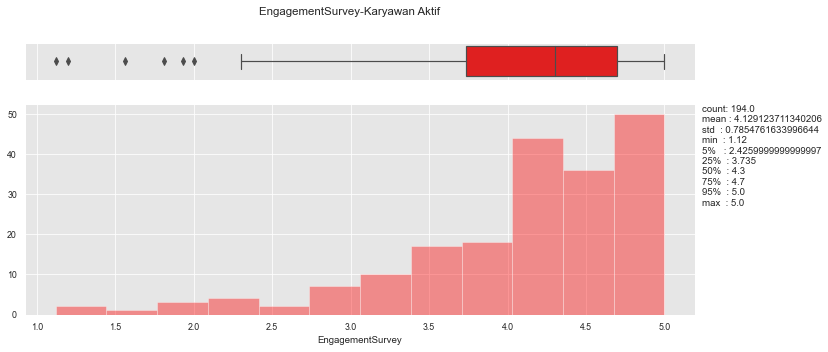

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


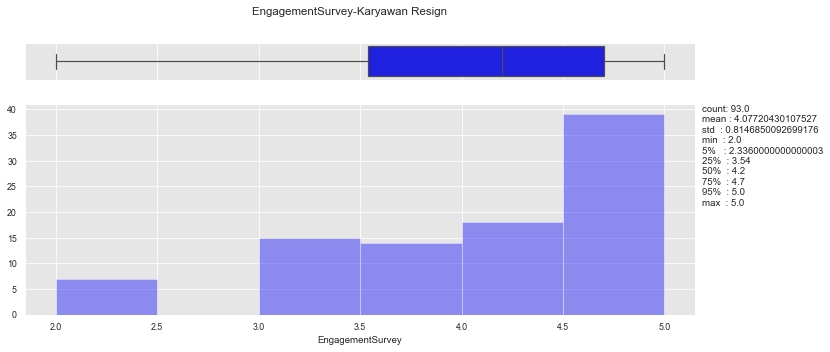

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


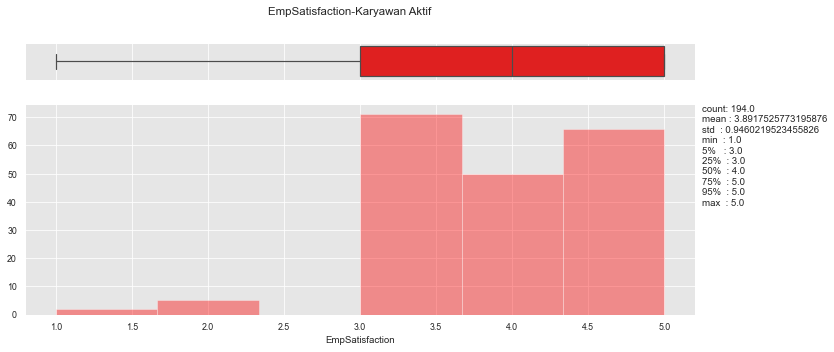

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


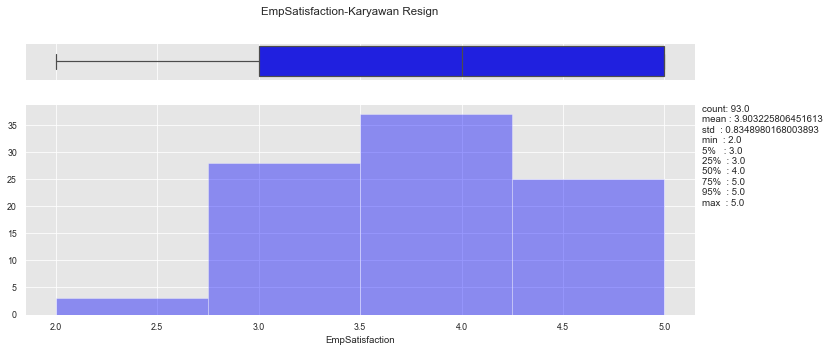

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


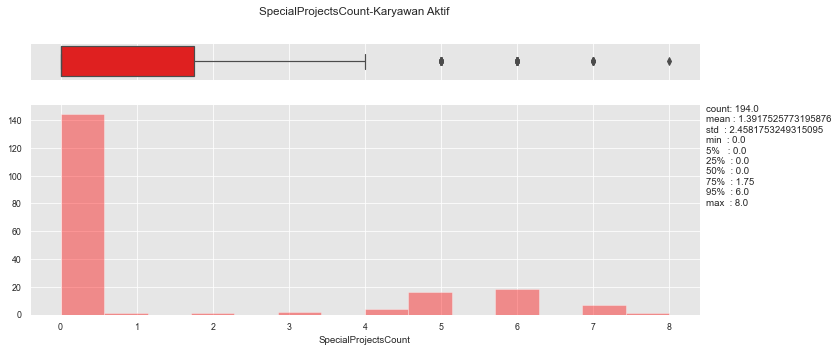

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


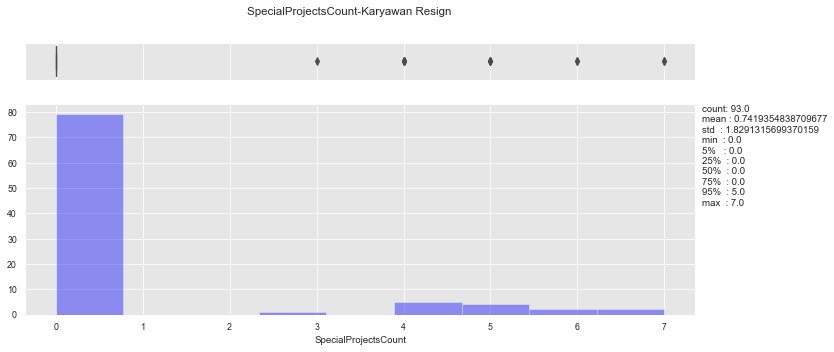

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


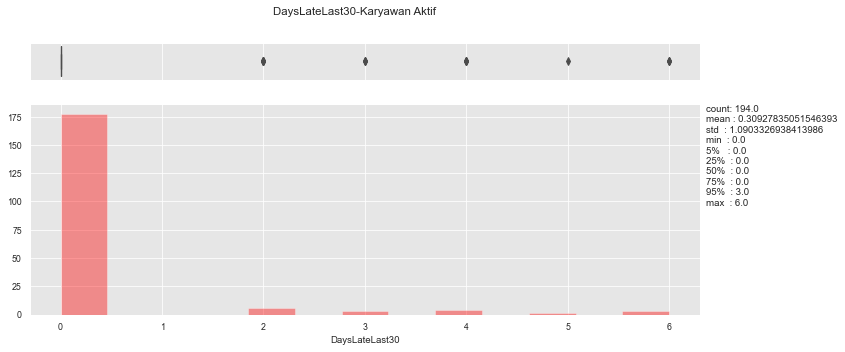

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


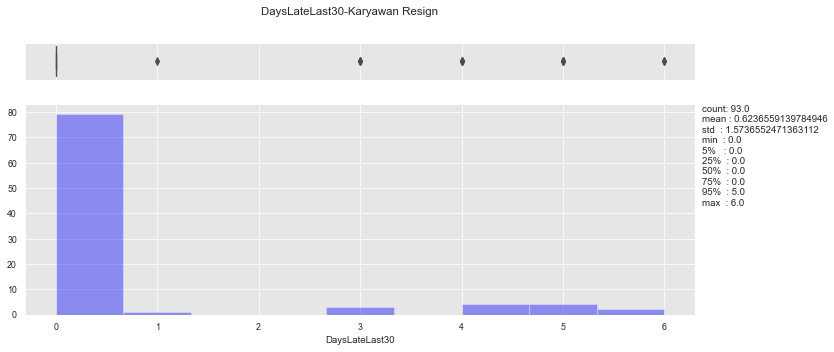

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


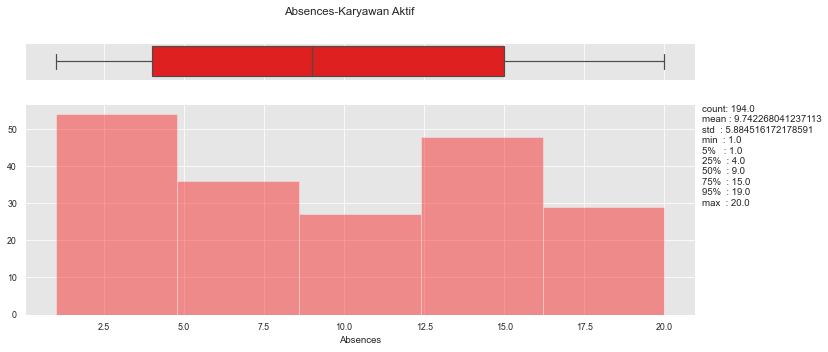

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


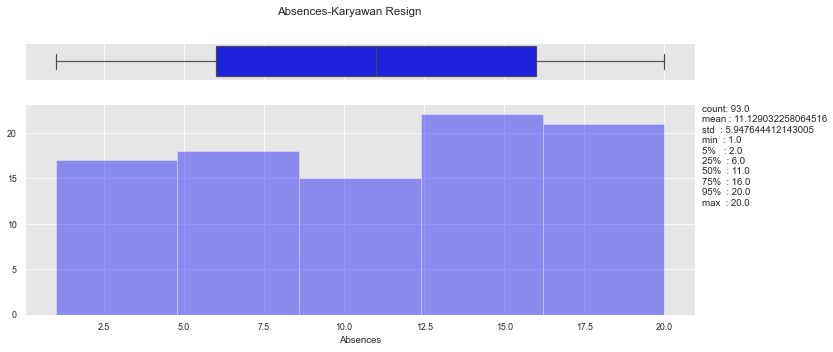

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


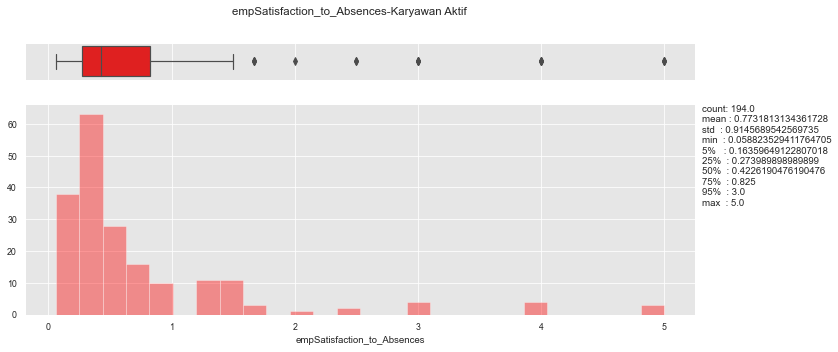

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


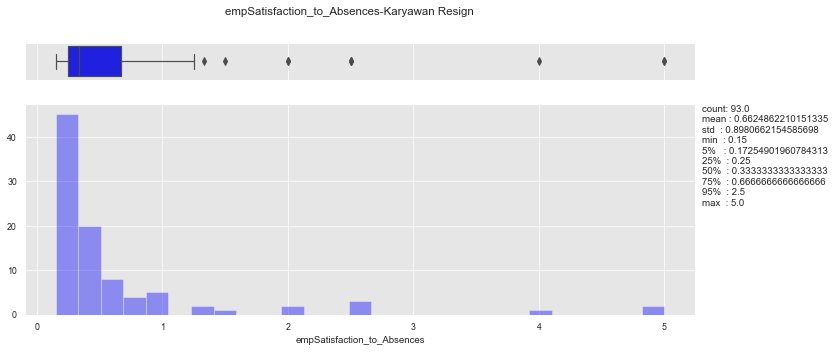

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


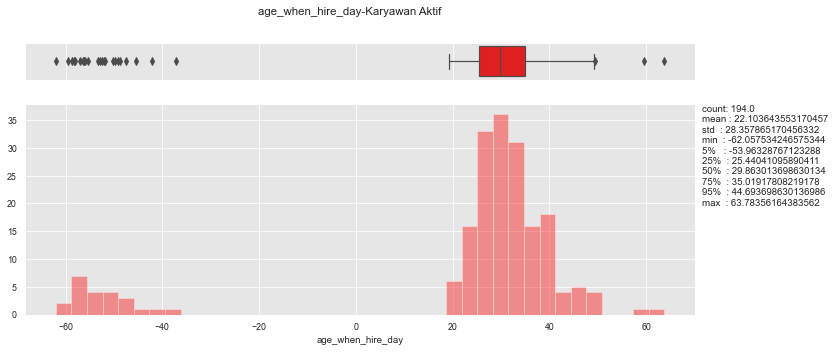

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


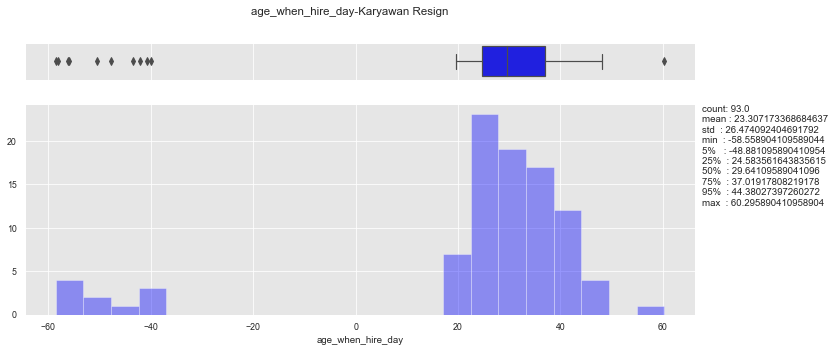

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


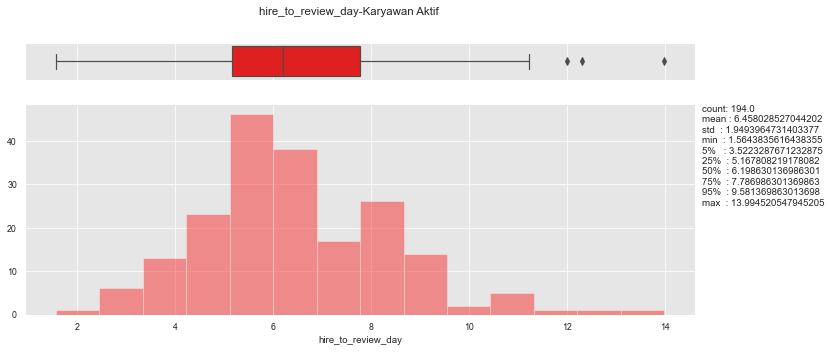

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


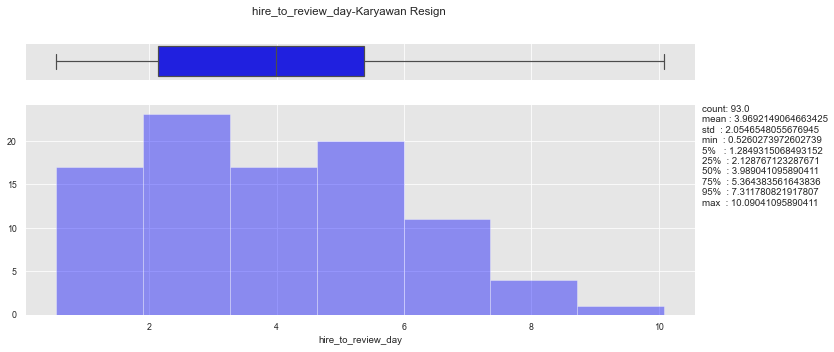

In [204]:
for i in range(len(list_numerikal)):
    box_hist_plot_1(data_active[list_numerikal[i]],'{}-Karyawan Aktif'.format(list_numerikal[i]))
    box_hist_plot_2(data_resign[list_numerikal[i]],'{}-Karyawan Resign'.format(list_numerikal[i]))

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


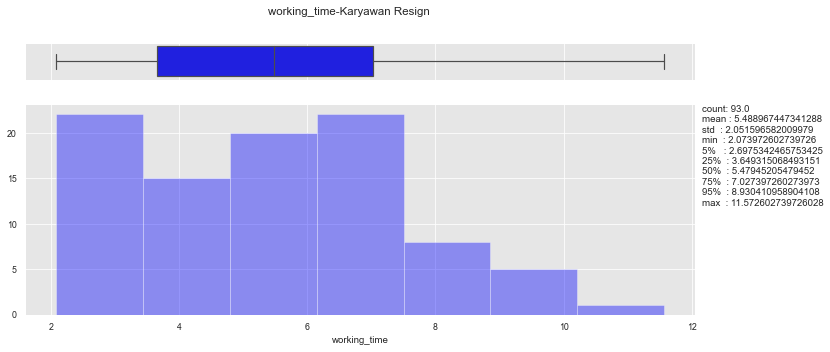

In [205]:
 box_hist_plot_2(data_resign['working_time'],'{}-Karyawan Resign'.format('working_time'))

# Analisis Pekerjaan Front-end dan Back-end yang resign

In [209]:
unhappy = data_resign.loc[data_resign['TermReason']=='unhappy']
unhappy

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,working_time
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890,6.468493
49,Christi Yanti Pardede,10050,Not married,Single,F,TKP/ Outsource,Front End Developer,Junior,Fully meets,EDU,Squad Pijar Corpu,1981-08-31,Bali,2011-05-16,2015-01-07,unhappy,0,Google Search,4.20,5,0,2013-05-03,0,9,0.555556,29.726027,1.967123,3.649315
65,Difa Al,10066,Married,Married,M,TKP/ Outsource,Mobile Developer Android,Junior,Need improvement,EDU,Squad Service Core,1977-10-31,Cina,2011-05-16,2018-06-08,unhappy,0,Indeed,5.00,4,0,2017-04-02,0,14,0.285714,33.561644,5.884932,7.068493
136,Irman Juliansyah,10137,Not married,Single,F,TKP/ Outsource,System Documentation,Middle,Need improvement,EDU,Squad Service Core,1976-09-22,Cina,2011-02-21,2015-04-01,unhappy,0,Google Search,3.72,3,0,2014-02-01,0,18,0.166667,34.438356,2.947945,4.109589
137,Ismi Dwi Lestari,10138,Not married,Single,M,TKP/ Outsource,Front End Developer,Junior,Need improvement,COM,UMEETME,1976-11-15,Bali,2011-02-21,2014-09-24,unhappy,0,Indeed,2.34,2,0,2013-04-12,3,4,0.500000,34.290411,2.139726,3.591781
146,Khonsa Qurrotul Ain,10147,Not married,Single,F,Prohire,Back End Developer,Junior,Fully meets,IHX,Squad C,1986-04-17,Jawa,2011-01-10,2018-04-01,unhappy,0,CareerBuilder,4.00,4,0,2017-02-03,0,4,1.000000,24.750685,6.071233,7.227397
168,Mochamad Ramdhan,10169,Married,Widowed,F,TKP/ Outsource,Scrum Master,Middle,Special treatment,EDU,Squad Pijar Sekolah,1981-03-26,Padang,2011-07-05,2020-09-26,unhappy,0,Indeed,3.18,4,0,2019-03-02,0,16,0.250000,30.295890,7.663014,9.235616
188,Muhammad Ilham Rilambang,10189,Not married,Single,M,Karyawan Organik,Product Owner,Junior,Exceed,EWD,Explore,1985-06-29,Cina,2011-08-15,2016-09-04,unhappy,0,LinkedIn,3.00,2,0,2014-01-14,6,6,0.333333,26.145205,2.419178,5.060274
206,Nurisyani,10207,Married,Married,F,Prohire,Back End Developer,Junior,Average,LGT,Logee Truck All Product,1952-02-11,Bali,2012-05-14,2015-08-19,unhappy,0,LinkedIn,5.00,3,0,2014-07-02,0,17,0.176471,60.295890,2.134247,3.265753
215,R. Abimanyu Sutomo,10216,Married,Divorced,F,TKP/ Outsource,Back End Developer,Senior,Exceed,ENT,HunianAja,1989-07-18,Cina,2011-07-05,2017-09-15,unhappy,0,CareerBuilder,2.40,5,0,2016-02-06,5,2,2.500000,21.978082,4.594521,6.202740


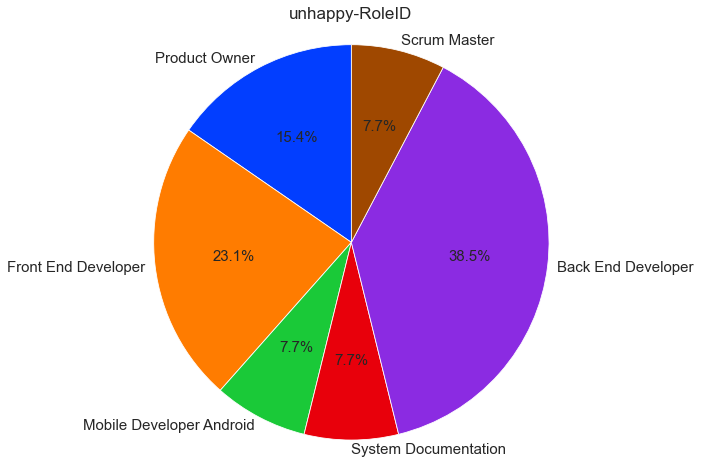

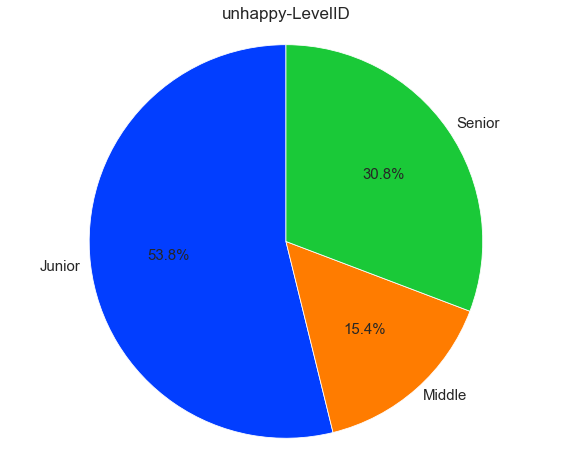

In [212]:
pie_charts(unhappy, 'RoleID', 'unhappy-RoleID')
pie_charts(unhappy, 'LevelID', 'unhappy-LevelID')


# Analisis Karyawan Junior yang resign

In [213]:
Junior = data_resign.loc[data_resign['LevelID']=='Junior']
Junior

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,DOB,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,empSatisfaction_to_Absences,age_when_hire_day,hire_to_review_day,working_time
10,Ahmad Luthfi Mahar,10011,Married,Divorced,F,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,ChatAja,1974-01-12,Jawa,2011-01-10,2019-01-12,Another position,0,Diversity Job Fair,4.20,4,0,2017-01-30,0,12,0.333333,37.019178,6.060274,8.010959
11,Akhdiyat Restu Fiqih,10012,Married,Divorced,M,TKP/ Outsource,Product Owner,Junior,Fully meets,COM,UMEETME,1974-02-21,Bali,2012-04-02,2018-09-19,unhappy,0,Diversity Job Fair,4.20,3,0,2017-05-06,0,15,0.200000,38.136986,5.095890,6.468493
14,Amalia Erza Syafitri,10015,Married,Married,M,TKP/ Outsource,UI Designer,Junior,Special treatment,EWD,Pay,1977-07-15,Cina,2012-09-24,2019-04-06,Another position,0,On-line Web application,5.00,5,0,2018-03-02,0,1,5.000000,35.219178,5.438356,6.534247
15,Amalia Nurul Hidayah,10016,Not married,Single,M,TKP/ Outsource,UX Designer,Junior,Fully meets,EWD,Sales Cycle,1981-10-18,Bali,2011-02-21,2019-08-04,attendance,0,Google Search,5.00,4,0,2018-04-05,0,20,0.200000,29.364384,7.123288,8.454795
18,Andre,10019,Not married,Single,F,Prohire,UI Designer,Junior,Fully meets,EDU,Squad Pijar Sekolah,1986-04-04,Padang,2014-07-07,2017-09-12,performance,0,Google Search,4.50,4,5,2016-01-15,0,8,0.500000,28.276712,1.526027,3.186301
24,Anshory Muhammad,10025,Married,Widowed,F,Prohire,UX Writer,Junior,Special treatment,ENT,MyPertamina,2067-01-16,Padang,2011-01-10,2016-04-04,career change,0,Google Search,4.80,5,0,2015-03-04,0,5,1.000000,-56.054795,4.147945,5.235616
25,Arief Luthfi,10026,Not married,Single,M,TKP/ Outsource,Artificial Intelligent,Junior,Exceed,IHX,Squad B,2064-07-30,Cina,2014-02-17,2018-02-19,Learned that he is a gangster,0,LinkedIn,3.50,5,7,2017-01-10,0,2,2.500000,-50.482192,2.898630,4.008219
46,Burhanudin Ramdhani,10047,Married,Married,F,TKP/ Outsource,Back End Developer,Junior,Average,FIN,Bonum,1983-08-27,Jawa,2011-06-27,2017-11-15,relocation out of area,0,Indeed,4.30,4,0,2016-03-10,0,3,1.333333,27.852055,4.706849,6.391781
49,Christi Yanti Pardede,10050,Not married,Single,F,TKP/ Outsource,Front End Developer,Junior,Fully meets,EDU,Squad Pijar Corpu,1981-08-31,Bali,2011-05-16,2015-01-07,unhappy,0,Google Search,4.20,5,0,2013-05-03,0,9,0.555556,29.726027,1.967123,3.649315
53,Darin Afaf Rafinda,10054,Not married,Single,M,TKP/ Outsource,Front End Developer,Junior,Fully meets,VGA,Ads Based,1979-08-12,Jawa,2011-07-11,2018-09-23,performance,0,LinkedIn,2.00,3,0,2017-05-01,5,16,0.187500,31.934247,5.810959,7.208219


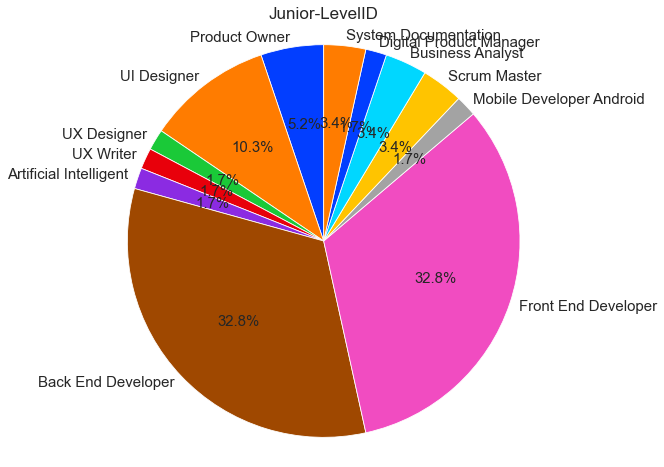

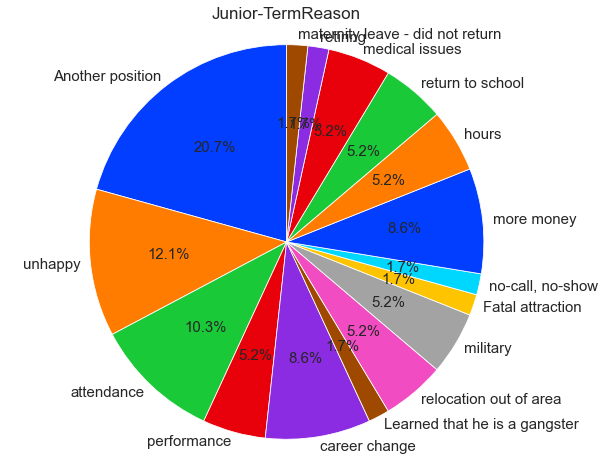

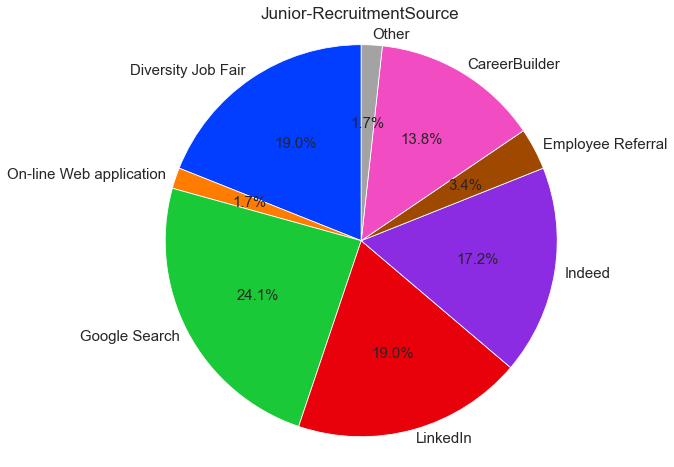

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


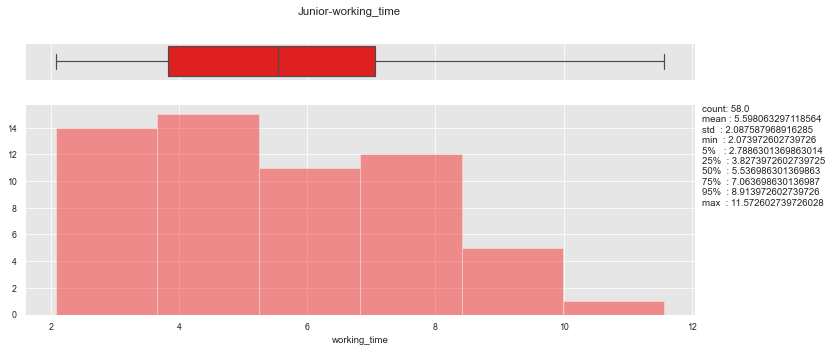

In [216]:
pie_charts(Junior, 'RoleID', 'Junior-LevelID')
pie_charts(Junior, 'TermReason', 'Junior-TermReason')
pie_charts(Junior, 'RecruitmentSource', 'Junior-RecruitmentSource')
box_hist_plot_1(Junior['working_time'],'Junior-working_time')